# Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 2: Data Augmentation and Data Generators
Set up data augmentation and data generators for loading images.

In [3]:
# Define paths
train_dir = "C:/Users/brain/Desktop/VIGILO/1_PreTrainingTheModel/FER2013Files/test"
test_dir = "C:/Users/brain/Desktop/VIGILO/1_PreTrainingTheModel/FER2013Files/train"

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Data augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'  # Use this subset for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'  # Use this subset for validation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 5746 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


# Step 3: Define the Model
Create a Convolutional Neural Network (CNN) for emotion recognition. #Standard CNN

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\brain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 4: Train the Model
Train the model using the training data generator and validate it using the validation data generator.

In [5]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 64,
    validation_steps=validation_generator.samples // 64
)

Epoch 1/50


C:\Users\brain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 414ms/step - accuracy: 0.2276 - loss: 1.8706 - val_accuracy: 0.2450 - val_loss: 1.8238
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1875 - loss: 1.8163 - val_accuracy: 0.3750 - val_loss: 1.7276
Epoch 3/50


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.2259 - loss: 1.8359 - val_accuracy: 0.2493 - val_loss: 1.8054
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.2500 - loss: 1.7560 - val_accuracy: 0.1667 - val_loss: 1.8082
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.2315 - loss: 1.8233 - val_accuracy: 0.2649 - val_loss: 1.7809
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.2500 - loss: 1.8375 - val_accuracy: 0.2500 - val_loss: 1.7840
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2565 - loss: 1.7845 - val_accuracy: 0.2962 - val_loss: 1.7530
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.2812 - loss: 1.7714 - val_accuracy: 0.4167 - val_loss: 1.5983
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.2907 - loss: 1.7494 - val_accuracy: 0.2805 - val_loss: 1.7298
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.3125 - loss: 1.7242 - val_accuracy: 0.4583 - val_los

# Step 5: Evaluate the Model
Evaluate the model to see how well it performs on the validation set.

In [6]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4720 - loss: 1.3617
Validation Loss: 1.3537641763687134
Validation Accuracy: 0.47555866837501526


# Step 6: Save the Model
Save the trained model to disk for later use.

In [7]:
model.save('emotion_model.h5')

# Training History

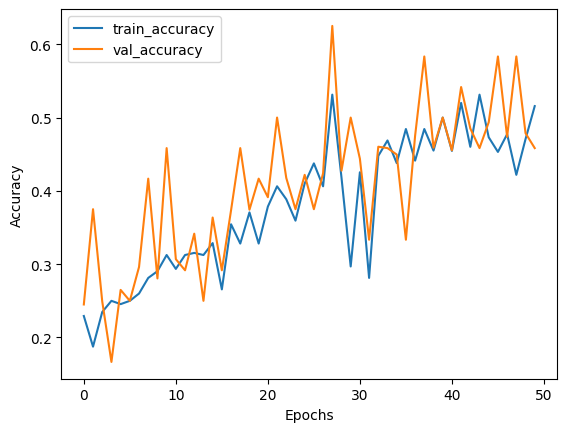

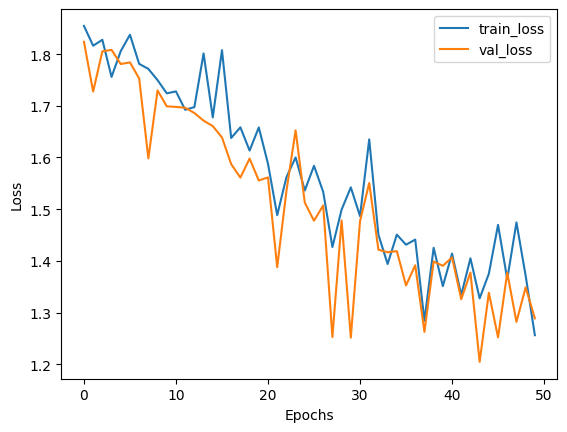

In [8]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()